In [150]:
import pandas as pd
df =pd.read_csv("D:\PROGRAMMING\LEARNING-REFERENCES\CarPrice_Assignment.csv")
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [151]:
df=df.drop(['car_ID','symboling'],axis=1)               #dropping unwanted columns
print(df)

                      CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation  wheelbase  carlength  carwidth  ...  \
0    

In [152]:
#selecting the datatypes for linear regression    #data cleaning    
cars_numeric=df.select_dtypes(include=['int64','float64'])
print(cars_numeric)

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               

In [153]:
x=cars_numeric.iloc[:,0:13].values      #.values for numoy array
print(x)

[[  88.6  168.8   64.1 ... 5000.    21.    27. ]
 [  88.6  168.8   64.1 ... 5000.    21.    27. ]
 [  94.5  171.2   65.5 ... 5000.    19.    26. ]
 ...
 [ 109.1  188.8   68.9 ... 5500.    18.    23. ]
 [ 109.1  188.8   68.9 ... 4800.    26.    27. ]
 [ 109.1  188.8   68.9 ... 5400.    19.    25. ]]


In [154]:
y=cars_numeric.iloc[:,-1].values
print(y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

In [155]:
from sklearn.model_selection import train_test_split     #75:25% split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)   #test_size=ntg, 0.3m

In [156]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 13)
(41, 13)
(164,)
(41,)


In [157]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [158]:
model.fit(x_train,y_train)

LinearRegression()

In [159]:
y_pred=model.predict(x_test)
print(y_pred)               #predicted output

[ 6208.24575538 19714.87703733 15087.29904636 -1452.37947648
 11257.61713485 13442.05117575  5943.64386713  6224.40363848
 23366.84540885  8482.53450906 15731.58420617 37414.86453533
  9507.44093588 13745.15770374  5786.72614487 13118.07071604
 11254.89343076 19283.34584978 10296.26857203  6072.45074736
 10655.33842417 18077.00057709 10915.00816634 13530.6395827
 21590.86571196  8044.25710103  6724.49692233 17715.14772187
  6824.58937703  5799.2534928   9719.42377855 11296.38177277
 21201.43560069  8466.77676069  5923.27726253 26620.84001019
 10496.31445469 16728.75708317  6588.9542141  37712.53582448
  5698.13773792]


In [160]:
print(y_test)                   #actual output

[ 6795.  15750.  15250.   5151.   9995.  11199.   5389.   7898.  17199.
  6529.  20970.  31400.5 10945.  18344.   8916.5  9989.   9295.  18920.
  7895.   6488.   9959.  15580.   9895.  11549.  15998.   5118.   6938.
 16695.   8358.   5499.   7975.  12290.  22018.   8948.   6849.  41315.
 11595.  18150.   6377.  45400.   8916.5]


In [161]:
len(y_pred)

41

Text(0.5, 0, 'y_pred')

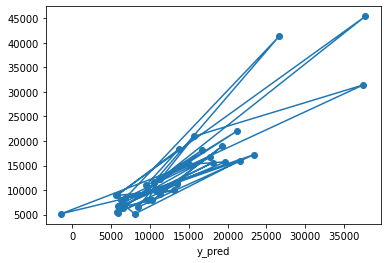

In [162]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_test)
plt.xlabel('y_pred')

In [186]:
df1=pd.DataFrame({'ACTUAL':y_test,'PREDICTED':y_pred})
print(df1)

     ACTUAL     PREDICTED
0    6795.0   6208.245755
1   15750.0  19714.877037
2   15250.0  15087.299046
3    5151.0  -1452.379476
4    9995.0  11257.617135
5   11199.0  13442.051176
6    5389.0   5943.643867
7    7898.0   6224.403638
8   17199.0  23366.845409
9    6529.0   8482.534509
10  20970.0  15731.584206
11  31400.5  37414.864535
12  10945.0   9507.440936
13  18344.0  13745.157704
14   8916.5   5786.726145
15   9989.0  13118.070716
16   9295.0  11254.893431
17  18920.0  19283.345850
18   7895.0  10296.268572
19   6488.0   6072.450747
20   9959.0  10655.338424
21  15580.0  18077.000577
22   9895.0  10915.008166
23  11549.0  13530.639583
24  15998.0  21590.865712
25   5118.0   8044.257101
26   6938.0   6724.496922
27  16695.0  17715.147722
28   8358.0   6824.589377
29   5499.0   5799.253493
30   7975.0   9719.423779
31  12290.0  11296.381773
32  22018.0  21201.435601
33   8948.0   8466.776761
34   6849.0   5923.277263
35  41315.0  26620.840010
36  11595.0  10496.314455
37  18150.0 

<AxesSubplot:>

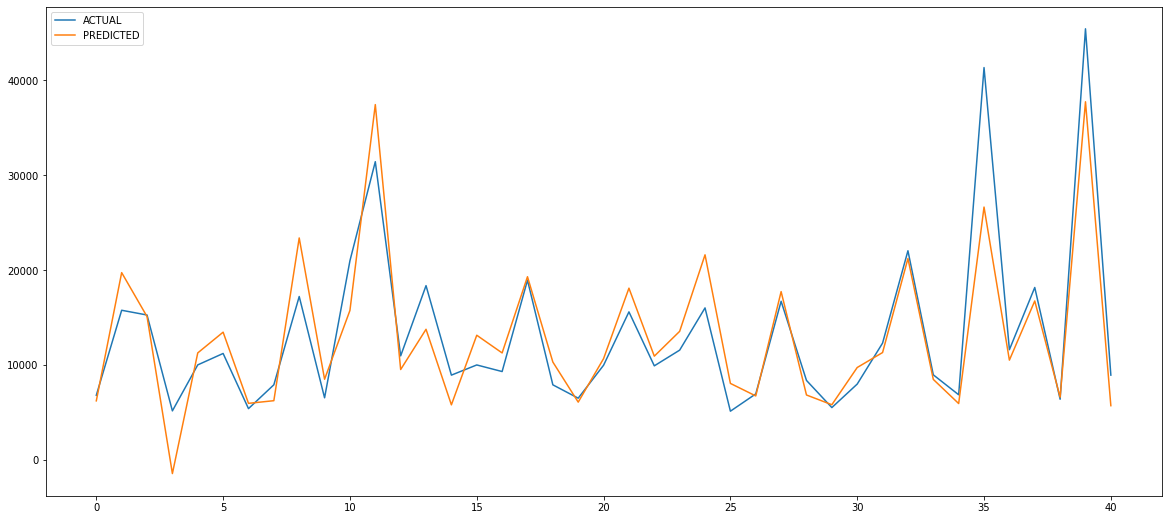

In [164]:
df1.plot(figsize=(20,9))

<AxesSubplot:>

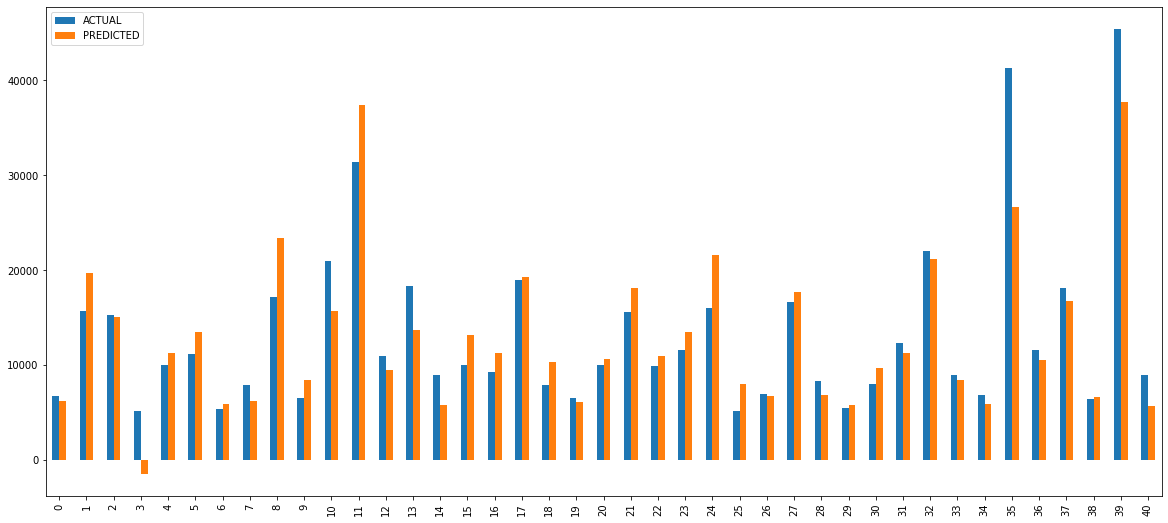

In [165]:
df1.plot(figsize=(20,9),kind='bar')

In [166]:
from sklearn.metrics import r2_score   #regression scpre=r2 score
r2_score(y_test,y_pred)

0.8181813278710407

In [167]:
# comparison  of r2_scores for different test and train sizes
 # 75:25%  0.838797091442626
# 70:30%   0.8240708685720224
# 80:20         0.8181813278710407

In [168]:
cars_numeric.head()  #select any one row from the below and enter all data except the last one
#seperate by comma

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [169]:
model.predict([[99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30]])

array([11667.75250914])

In [170]:
#predicted val =11667.75250914
# actual value=13950.0

In [171]:
import pickle
pickle.dump(model,open('multi_lin_regr.pkl','wb'))

[ 6795.  15750.  15250.   5151.   9995.  11199.   5389.   7898.  17199.
  6529.  20970.  31400.5 10945.  18344.   8916.5  9989.   9295.  18920.
  7895.   6488.   9959.  15580.   9895.  11549.  15998.   5118.   6938.
 16695.   8358.   5499.   7975.  12290.  22018.   8948.   6849.  41315.
 11595.  18150.   6377.  45400.   8916.5] [ 6208.24575538 19714.87703733 15087.29904636 -1452.37947648
 11257.61713485 13442.05117575  5943.64386713  6224.40363848
 23366.84540885  8482.53450906 15731.58420617 37414.86453533
  9507.44093588 13745.15770374  5786.72614487 13118.07071604
 11254.89343076 19283.34584978 10296.26857203  6072.45074736
 10655.33842417 18077.00057709 10915.00816634 13530.6395827
 21590.86571196  8044.25710103  6724.49692233 17715.14772187
  6824.58937703  5799.2534928   9719.42377855 11296.38177277
 21201.43560069  8466.77676069  5923.27726253 26620.84001019
 10496.31445469 16728.75708317  6588.9542141  37712.53582448
  5698.13773792]


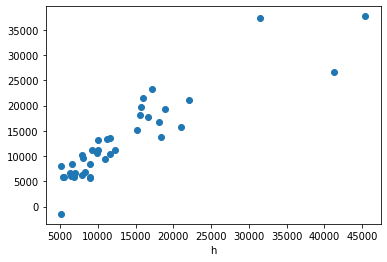

In [191]:

import matplotlib.pyplot as plt
import numpy as np
x=y_test
y=y_pred
print(x,y)
plt.xlabel("h")
plt.plot(x,y,'o')
plt.show()